In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

#### Import dataset and familiar with it

In [24]:
airbnb = pd.read_csv('AB_NYC_2019.csv')
print("Observations in the dataset:",len(airbnb))
airbnb.head()

Observations in the dataset: 48895


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Cleaning and preprocessing data
Check type of each column

In [25]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

To compute the number of 'Nan' values in each column

In [26]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Drop the irrelevant coloumns: name, host_name (we do not care about their name, and they contain 'Nan' values), last_review (is not helpful).
Append value of reviews_per_month with 0

In [27]:
airbnb = airbnb.drop(['name','host_name','last_review'], axis=1).reset_index(drop=True)
airbnb = airbnb.fillna({'reviews_per_month':0})

#### Analysing data

Get unique value of 'neighbourhood_group', 'neighbourhood', and 'room_type'

In [68]:
unique_neig_group = airbnb.neighbourhood_group.unique()
unique_neig = airbnb.neighbourhood.unique()
unique_room_type = airbnb.room_type.unique()
print("Unique value of \'neighbor_group\' are:", unique_neig_group)
print("Number of unique value of \'neighbourhood\' is:", len(unique_neig))
print("Unique value of \'room_type\' are:", unique_room_type)

Unique value of 'neighbor_group' are: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Number of unique value of 'neighbourhood' is: 221
Unique value of 'room_type' are: ['Private room' 'Entire home/apt' 'Shared room']


Count values of each host_id to get the top 10 hosts with the most listings

In [127]:
top_10_host = airbnb.host_id.value_counts().head(10)
print("the top 10 hosts with the most listings are (just showing the host-id):")
top_10_host_df = pd.DataFrame(data=top_10_host).reset_index()
top_10_host_df = top_10_host_df.rename(columns={'index':'host_id', 'host_id':'count'})
top_10_host_df

the top 10 hosts with the most listings are (just showing the host-id):


,host_id,count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


The bar plot for the top 10 hosts

[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

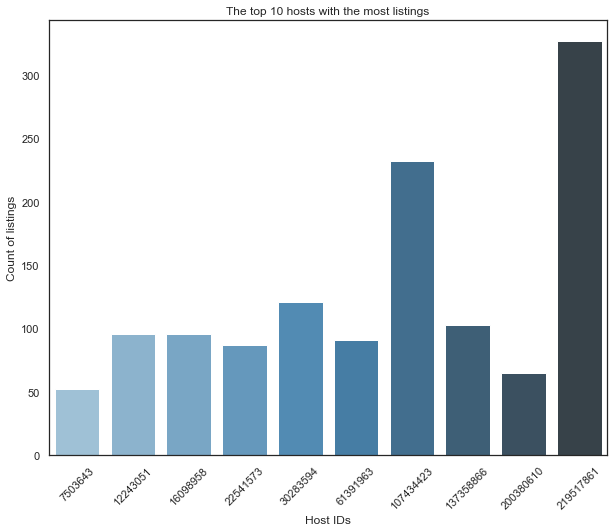

In [128]:
ax = sns.barplot(x="host_id", y="count", data=top_10_host_df, palette='Blues_d')
ax.set_title('The top 10 hosts with the most listings')
ax.set_ylabel('Count of listings')
ax.set_xlabel('Host IDs')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Distribution of price for each neighbourhood_group

In [89]:
price_distri_of_neighbor = []
for neigh_group in unique_neig_group:
    sub = airbnb.loc[airbnb['neighbourhood_group'] == neigh_group]
    price_distri_of_neighbor.append(sub[['price']].describe().rename(columns={'price':neigh_group}))

stat_df = price_distri_of_neighbor
table_distribution = price_distri_of_neighbor[0].join(price_distri_of_neighbor[1:])
table_distribution

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
count,20104.000000,21661.000000,5666.000000,373.000000,1091.000000
mean,124.383207,196.875814,99.517649,114.812332,87.496792
std,186.873538,291.383183,167.102155,277.620403,106.709349
min,0.000000,0.000000,10.000000,13.000000,0.000000
25%,60.000000,95.000000,50.000000,50.000000,45.000000
50%,90.000000,150.000000,75.000000,75.000000,65.000000
75%,150.000000,220.000000,110.000000,110.000000,99.000000
max,10000.000000,10000.000000,10000.000000,5000.000000,2500.000000


Text(0.5, 1.0, 'Density and distribution of prices (< 300) for each neighberhood group')

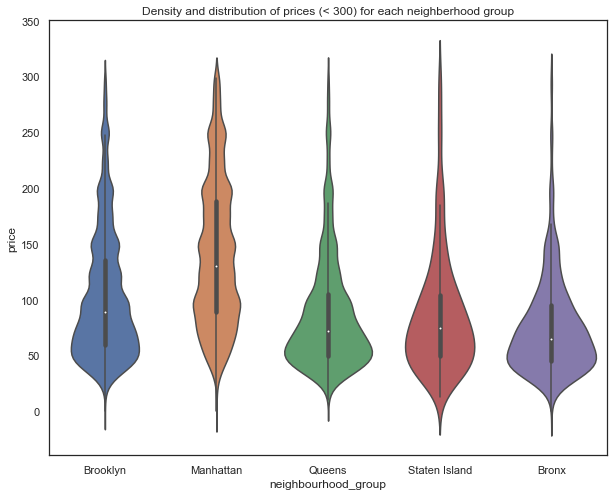

In [96]:
price_lowerthan_300 = airbnb[airbnb.price < 300]
ax2 = sns.violinplot(x="neighbourhood_group", y="price", data=price_lowerthan_300)
ax2.set_title('Density and distribution of prices (< 300) for each neighberhood group')

The top 10 areas with the most listings

In [129]:
top_10_area = airbnb.neighbourhood.value_counts().head(10).index.values
print("The top 10 areas with the most listings are:", top_10_area)

The top 10 areas with the most listings are: ['Williamsburg' 'Bedford-Stuyvesant' 'Harlem' 'Bushwick' 'Upper West Side'
 "Hell's Kitchen" 'East Village' 'Upper East Side' 'Crown Heights'
 'Midtown']


The number of listings of each room type for each area (top 10 areas)

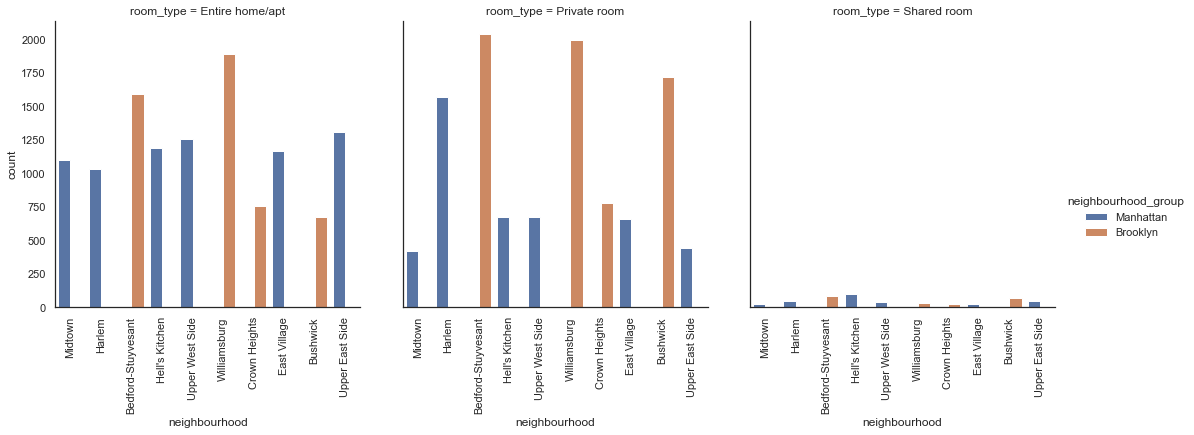

In [103]:
top_10_area_info = airbnb.loc[airbnb['neighbourhood'].isin(top_10_area)]
ax3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=top_10_area_info, kind='count')
ax3.set_xticklabels(rotation=90)

In [106]:
min_latitude = airbnb['latitude'].min()
max_latitude = airbnb['latitude'].max()
min_longitude = airbnb['longitude'].min()
max_longitude = airbnb['longitude'].max()
print("the minimum latitude:", min_latitude)
print("the maximum latitude:", max_latitude)
print("the minimum longitude:", min_longitude)
print("the maximum longitude:", max_longitude)

the minimum latitude: 40.49979
the maximum latitude: 40.91306
the minimum longitude: -74.24442
the maximum longitude: -73.71299


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

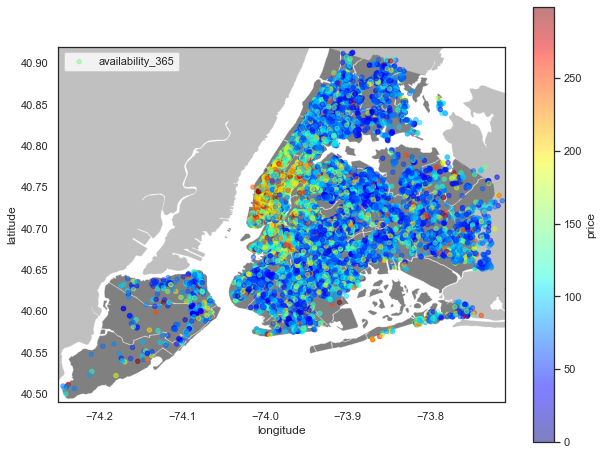

In [126]:
import urllib

plt.figure(figsize=(10,8))

image_name = 'nyc_map.PNG'
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG', image_name)
nyc_img = plt.imread(image_name)
plt.imshow(nyc_img, extent=[-74.25, -73.71, 40.49,40.92])

ax4 = plt.gca()
price_lowerthan_300.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax4, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.5)

The 10 most popular listings

In [130]:
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,903972,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,903947,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,891117,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,10101135,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,8168619,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,834190,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,16276632,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,3474320,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,166172,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0
